In [1]:
import pandas as pd
import numpy as np

In [2]:
df_medical_data = pd.read_csv("data/insurance.csv")
print(df_medical_data.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [3]:
df_medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
from sklearn.utils import resample

# Bootstrapping
synthetic_data = resample(df_medical_data, n_samples=10000, replace = True, random_state=42)
synthetic_data.head(10)

,age,sex,bmi,children,smoker,region,charges
1126,55,male,29.900,0,no,southwest,10214.63600
860,37,female,47.600,2,yes,southwest,46113.51100
1294,58,male,25.175,0,no,northeast,11931.12525
1130,39,female,23.870,5,no,southeast,8582.30230
1095,18,female,31.350,4,no,northeast,4561.18850
1044,55,male,35.245,1,no,northeast,11394.06555
121,18,male,23.750,0,no,northeast,1705.62450
466,60,female,28.700,1,no,southwest,13224.69300
1238,37,male,22.705,3,no,northeast,6985.50695
330,61,female,36.385,1,yes,northeast,48517.56315


In [5]:
df_medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
synthetic_data.describe()

,age,bmi,children,charges
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.299100,30.584285,1.072600,13272.795059
std,14.089538,6.202784,1.182315,12117.035274
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.125000,0.000000,4710.601913
50%,39.000000,30.210000,1.000000,9411.005000
75%,51.000000,34.700000,2.000000,16796.411940
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
synthetic_data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
1126   55    male  29.900         0     no  southwest  10214.63600
860    37  female  47.600         2    yes  southwest  46113.51100
1294   58    male  25.175         0     no  northeast  11931.12525
1130   39  female  23.870         5     no  southeast   8582.30230
1095   18  female  31.350         4     no  northeast   4561.18850
...   ...     ...     ...       ...    ...        ...          ...
6      46  female  33.440         1     no  southeast   8240.58960
727    29  female  21.755         1    yes  northeast  16657.71745
68     40  female  36.190         0     no  southeast   5920.10410
1104   37    male  29.800         0     no  southwest  20420.60465
541    20  female  31.790         2     no  southeast   3056.38810

[10000 rows x 7 columns]>

In [8]:
df_medical_data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [9]:
# import openpyxl

# synthetic_data.to_excel("data/synthetic_data.xlsx")

In [10]:
# Adding noise to numerical variables
numerical_cols = ['age', 'bmi', 'charges']
for col in numerical_cols:
    std_dev = synthetic_data[col].std() * 0.1
    noise = np.random.normal(0, std_dev, size=synthetic_data[col].shape)
    synthetic_data[col] += noise

In [11]:

swap_ratio = 1
print(int(len(synthetic_data) * swap_ratio))

10000


In [12]:
# Adding random noise to children
noise_children = np.random.randint(-1, 1, size=synthetic_data['children'].shape)
synthetic_data['children'] = (synthetic_data['children'] + noise_children).clip(0)

# Adding noise to categorical variables
for col in ['sex', 'smoker']:
    flip_mask = np.random.rand(len(synthetic_data)) < 0.1
    unique_values = synthetic_data[col].unique()
    value_map = {v: unique_values[(i+1) % len(unique_values)] for i, v in enumerate(unique_values)}
    synthetic_data.loc[flip_mask, col] = synthetic_data.loc[flip_mask, col].map(value_map)

# Adding noite to categorical variables
for col in ['sex', 'smoker']:
    flip_mask = np.random.rand(len(synthetic_data)) < 0.1
    unique_values = synthetic_data[col].unique()
    value_map = {v: unique_values[(i+1) % len(unique_values)] for i, v in enumerate(unique_values)}
    synthetic_data.loc[flip_mask, col] = synthetic_data.loc[flip_mask, col].map(value_map)


# # Region Swapping
# swap_ratio = 0.1
# indices_to_swap = np.random.choice(synthetic_data.index, size=int(len(synthetic_data) * swap_ratio), replace=False)
# all_regions = synthetic_data['region'].unique()
# synthetic_data.loc[indices_to_swap, 'region'] = np.random.choice(all_regions, size=len(indices_to_swap))

print(synthetic_data.head(20))

            age     sex        bmi  children smoker     region       charges
1126  50.941574    male  29.688785         0    yes  southwest  10467.847018
860   35.028201  female  46.796239         1    yes  southwest  44693.519727
1294  56.688009    male  24.579293         0     no  northeast  11503.049255
1130  39.787919  female  23.982736         5    yes  southeast   8446.946973
1095  16.100921  female  31.583596         4     no  northeast   4694.609378
1044  55.759795    male  35.167468         0     no  northeast  11424.843835
121   18.307694  female  23.957324         0     no  northeast   1384.466079
466   56.676852  female  27.528550         1     no  southwest  13106.223376
1238  37.762183  female  21.950570         2     no  northeast   7378.631530
330   61.827688  female  35.499441         1    yes  northeast  49026.417005
87    57.507722  female  27.473946         0     no  southwest  11427.682529
1123  24.048155  female  32.029656         1     no  northeast  20503.296965

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

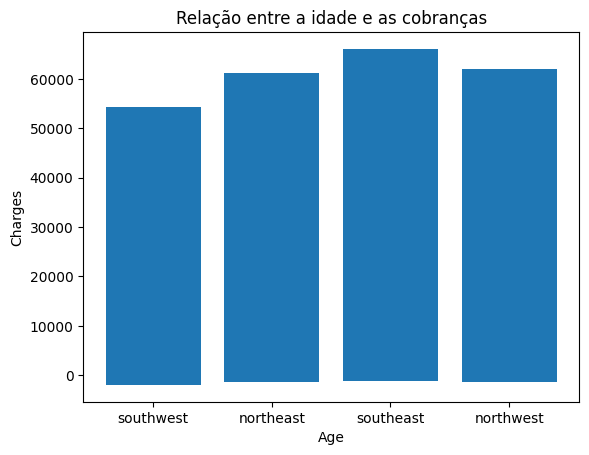

In [14]:
plt.bar(synthetic_data['region'], synthetic_data['charges'])
# plt.scatter(synthetic_data['region'], synthetic_data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relação entre a idade e as cobranças')
plt.show()

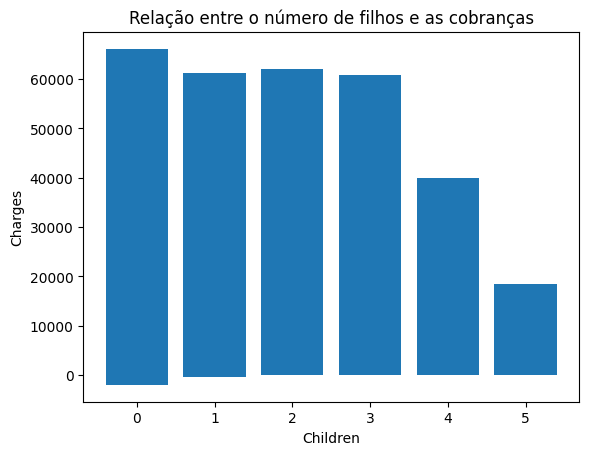

In [15]:
plt.bar(synthetic_data['children'], synthetic_data['charges'])
plt.title('Relação entre o número de filhos e as cobranças')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

In [16]:
synthetic_data['age']= synthetic_data['age'].astype(int)

In [17]:
synthetic_data.head(3)

,age,sex,bmi,children,smoker,region,charges
1126,50,male,29.688785,0,yes,southwest,10467.847018
860,35,female,46.796239,1,yes,southwest,44693.519727
1294,56,male,24.579293,0,no,northeast,11503.049255


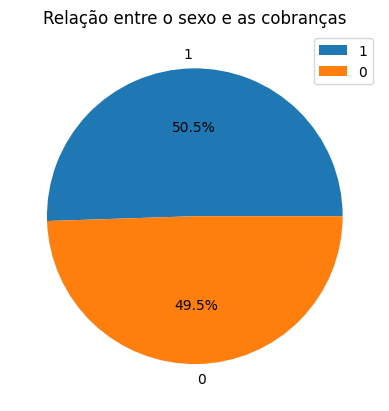

In [84]:
plt.pie(synthetic_data['sex'].value_counts(), labels = synthetic_data['sex'].unique(), autopct='%1.1f%%')
plt.title('Relação entre o sexo e as cobranças')
plt.legend()
plt.show()
# Como assim idêntico? adicionar mais noise nos dados
# Tentar adicionar uma coluna de data


<Axes: xlabel='age', ylabel='charges'>

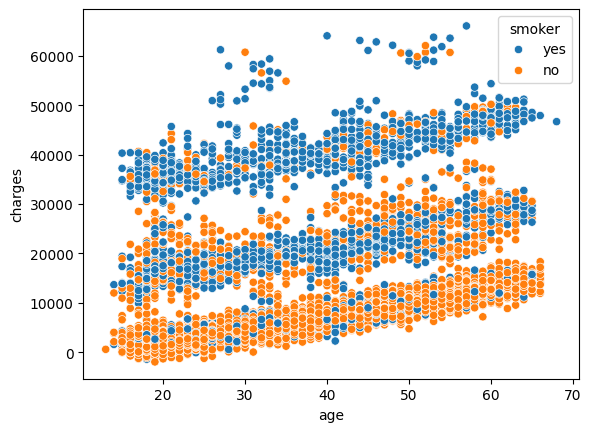

In [19]:
sns.scatterplot(x='age', y='charges', data=synthetic_data, hue='smoker')

<Axes: xlabel='charges', ylabel='bmi'>

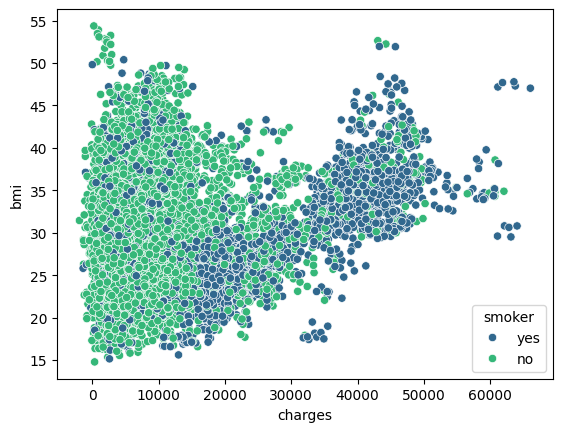

In [20]:
sns.scatterplot(x='charges', y='bmi', data=synthetic_data, hue='smoker', palette='viridis')

<Axes: >

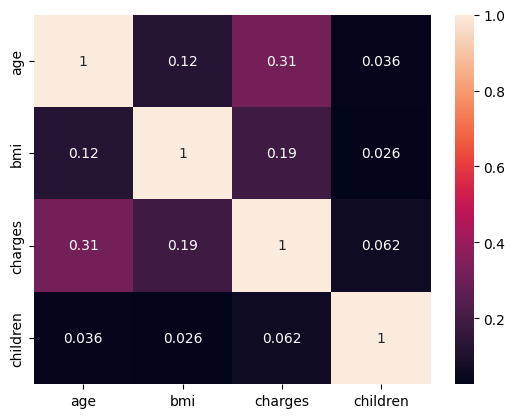

In [21]:
heatmap_data = synthetic_data[['age', 'bmi', 'charges', 'children']]
corr = heatmap_data.corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='age', ylabel='charges'>

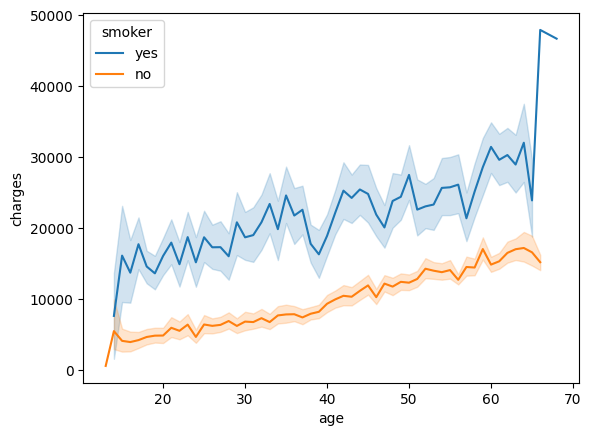

In [22]:
sns.lineplot(x='age', y='charges', data=synthetic_data, hue='smoker')

In [23]:
synthetic_data.head(3)

,age,sex,bmi,children,smoker,region,charges
1126,50,male,29.688785,0,yes,southwest,10467.847018
860,35,female,46.796239,1,yes,southwest,44693.519727
1294,56,male,24.579293,0,no,northeast,11503.049255


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


categorial_feature_mask = synthetic_data.dtypes==object
print(categorial_feature_mask)


categorical_cols = synthetic_data.columns[categorial_feature_mask].tolist()
print(categorical_cols)

synthetic_data = synthetic_data.apply(lambda col: encoder.fit_transform(col))


age         False
sex          True
bmi         False
children    False
smoker       True
region       True
charges     False
dtype: bool
['sex', 'smoker', 'region']


In [25]:
encoded_df = synthetic_data
encoded_df = pd.get_dummies(encoded_df, columns=["region","smoker","sex"])
#encoded_df.head(3)

df_test = synthetic_data



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df_test.drop('charges', axis=1)
y = df_test['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'MAE: {mae}')

MSE: 4721107.208405442
RMSE: 2172.8109002868705
R2: 0.436089207010407
MAE: 1655.11461981122


In [28]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')



MSE: 6821035.6485
MAE: 1612.6095


In [29]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 4762681.278013097
MAE: 1691.246282805753
R2: 0.43112340862342746


In [30]:
df_encoded = pd.get_dummies(df_test, columns=['region'], )

df_encoded['sex'].replace({"female":0, "male":1}, inplace=True)
df_encoded['smoker'].replace({"no":0, "yes":1}, inplace=True)
# df_encoded['region_0'].replace({"True":1, "False":0}, inplace=True)
# df_encoded['region_1'].replace({"True":1, "False":0}, inplace=True)
# df_encoded['region_2'].replace({"True":1, "False":0}, inplace=True)
# df_encoded['region_3'].replace({"True":1, "False":0}, inplace=True)


df_encoded.head(3)

C:\Users\gabriel.bonpam\AppData\Local\Temp\ipykernel_1640\1257878653.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['sex'].replace({"female":0, "male":1}, inplace=True)
C:\Users\gabriel.bonpam\AppData\Local\Temp\ipykernel_1640\1257878653.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
1126,37,1,4665,0,1,5490,False,False,False,True
860,22,0,9912,1,1,9686,False,False,False,True
1294,43,1,1744,0,0,6002,True,False,False,False


In [31]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 4370411.505970575
MAE: 1584.0627437530122
R2: 0.4779779172066073


-------------------------------------------------------------------

In [32]:
df = pd.read_csv("data/insurance2.csv")


In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
df.duplicated().sum()

1

In [37]:
continous = ['age', 'bmi', 'charges']
discrete_count=['children']
categorical = ["sex", "smoker", "region"]

In [38]:
df[continous].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [39]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [40]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [41]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [42]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [43]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [44]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [45]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [46]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [47]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [48]:
corr = df[continous].corr()

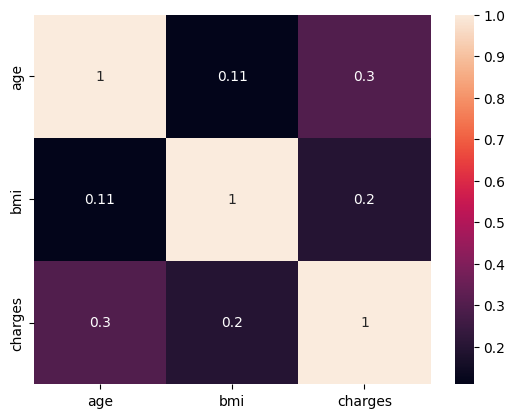

In [49]:
sns.heatmap(corr, annot=True)
plt.show()

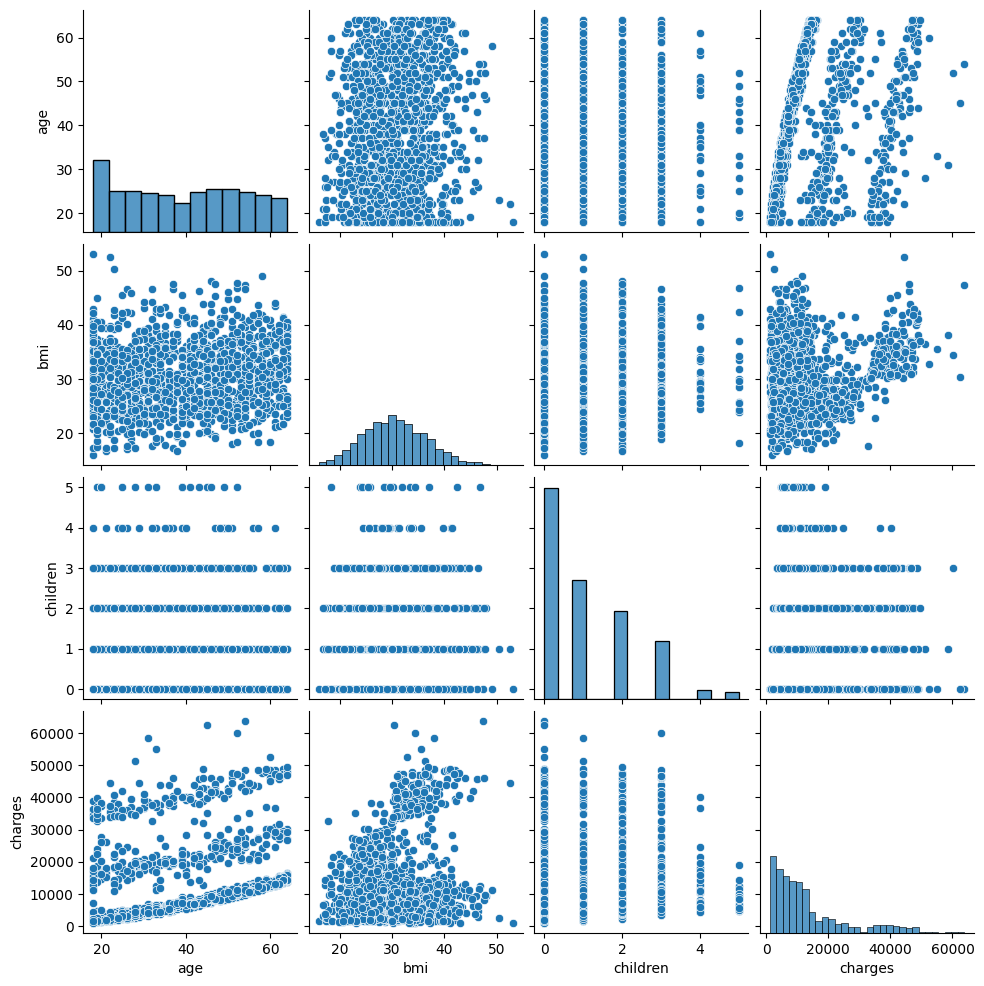

In [50]:
sns.pairplot(df)
plt.show()

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

0

In [53]:
df['sex'].replace({"female":0,"male":1}, inplace=True)
df['smoker'].replace({"no":0,"yes":1}, inplace=True)
df['region'].replace({"southwest":0,"southeast":1,"northwest":2,"northeast":3}, inplace=True)
df.head()

C:\Users\gabriel.bonpam\AppData\Local\Temp\ipykernel_1640\3778713168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({"female":0,"male":1}, inplace=True)
C:\Users\gabriel.bonpam\AppData\Local\Temp\ipykernel_1640\3778713168.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [54]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [55]:
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [56]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [57]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [59]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=11)

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficient: [  302.53100516   226.49364863   311.11041568   982.94743173
 23565.02953456   214.39585013]
Intercept: -14314.159973146783


In [61]:
ŷ_train = reg.predict(X_train)

from sklearn.metrics import r2_score
print('Train R2: ', r2_score(ŷ_train, y_train))
      
ŷ_test = reg.predict(X_test)
print('Test R2: ', r2_score(ŷ_test, y_test))

from sklearn.model_selection import cross_val_score
print('CV score:', cross_val_score(reg, X_train, y_train, cv=5).mean())

Train R2:  0.676502860152622
Test R2:  0.6706648368578538
CV score: 0.7140279835905625


In [62]:
error = ŷ_test - y_test

In [63]:
error.skew()

-1.2043036112047032

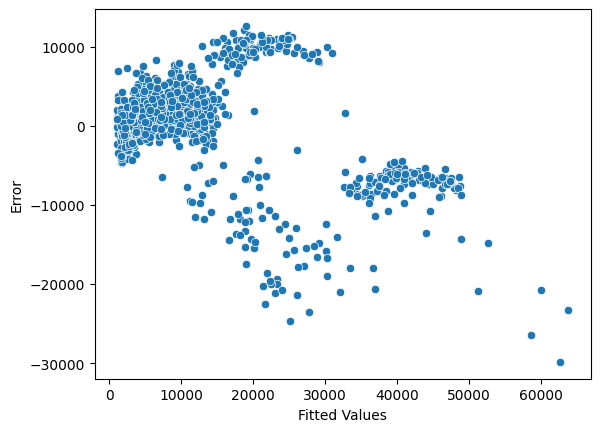

In [64]:
sns.scatterplot(x=y_test, y=error)
plt.xlabel('Fitted Values')
plt.ylabel('Error')
plt.show()

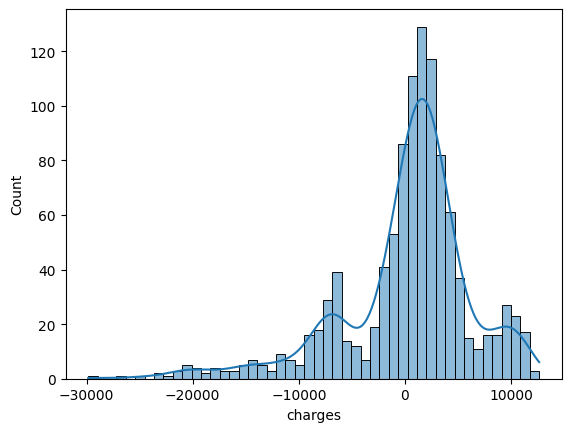

In [65]:
sns.histplot(error, kde = True)
plt.show()

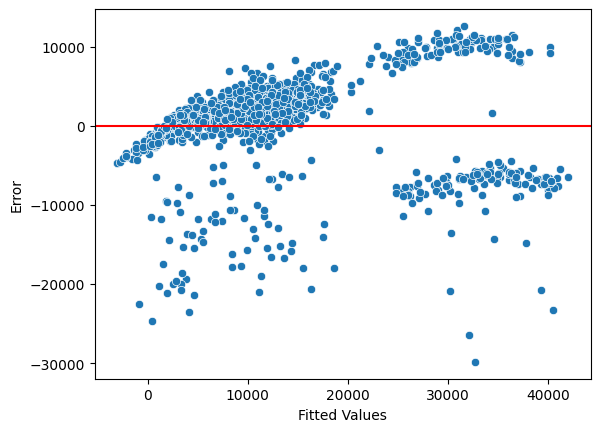

In [66]:
sns.scatterplot(x=ŷ_test, y=error)
plt.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Error')
plt.show()

In [67]:
import statsmodels.formula.api as smf
model = smf.ols('y~x', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.0
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        21:08:24   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.287e+04   1013.992    -12.696      0.000   -1.49e+04   -1.09e+04
x[0]         257.2032     11.899     21.616      0.000     233.861     280.546
x[1]        -129.4009    333.059     -0.389      0.698    -782.779     523.978
x[2]         332.5957     27.733     11.993      0.000     278.191     387.000
x[3]         478.7717    137.732      3.476      0.001     208.576     748.967
x[4]        2.382e+04    412.051     57.806      0.000     2.3e+04    2.46e+04
x[5]         354.0097    151.995      2.329      0.020      55.834     652.185
==============================================================================
Omnibus:                      298.466   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.712
Skew:                           1.206   Prob(JB):                    2.84e-155
Kurtosis:                       5.637   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Hyper Parameter Tuning

train_r2 =[]
test_r2 = []

for i in range(2,11):
    from sklearn.preprocessing import PolynomialFeatures
    poly_converter = PolynomialFeatures(degree=i)
    x_train_poly = pd.DataFrame(poly_converter.fit_transform(X_train))

    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(x_train_poly, y_train)

    ŷ_train = reg.predict(x_train_poly)
    train_r2.append(r2_score(ŷ_train, y_train))

    ŷ_test = reg.predict(poly_converter.transform(X_test))
    test_r2.append(r2_score(ŷ_test, y_test))

In [69]:
train_r2

[0.8259448722334349,
 0.8539910386983266,
 0.9053720203012535,
 0.9897831517316885,
 0.999999999804842,
 0.9999999999999865,
 0.9999999999997423,
 0.9999999999993135,
 0.999999999999999]

In [70]:
test_r2

[0.7892814162223611,
 0.747230529912632,
 0.20489468991112303,
 -0.010467146046001963,
 -0.004145770194724507,
 -0.00038336221574808427,
 -0.002797900044329893,
 -0.00205874864881217,
 -0.0016217459155072333]

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
polynomial_converter = PolynomialFeatures(degree=2)
x_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train))

from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x_train_poly, y_train)

print('Coefficient: ', reg1.coef_)
print('Intercept: ', reg1.intercept_)

Coefficient:  [-1.65391347e+14  3.87640678e+02  1.66927137e+03  5.23411684e-01
  5.59168370e+02 -1.09674277e+04  2.03790973e+02 -1.42051542e+00
  2.97160132e+01  2.95963610e+00 -1.46936079e+00 -1.44479634e+02
 -2.84088347e+01  1.66927137e+03 -1.14534765e+02 -5.51271021e+01
  1.77106392e+02 -1.37704752e+03 -4.16901227e+00  5.06708201e+01
  1.66859879e+03  1.01064089e+02 -5.66213726e+02  1.00329040e+02
  4.61154711e+02 -1.09674277e+04 -4.21300895e+02 -4.48280700e+02]
Intercept:  165391347202514.1


In [73]:
ŷ_train = reg1.predict(x_train_poly)
print('Train R2: ', r2_score(ŷ_train, y_train))

ŷ_test = reg1.predict(polynomial_converter.fit_transform(X_test))
print('Test R2: ', r2_score(ŷ_test, y_test))

print('CV score: ', cross_val_score(reg1, x, y, cv=5).mean())

Train R2:  0.8259448722334349
Test R2:  0.7892814162223611
CV score:  0.7471285330088384


In [74]:
# Lasso Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

estimator = Lasso()

param_grid = {'alpha':[0.1,0.5,1,7,50,60]}

model = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')

model.fit(X_train, y_train)

model.best_params_

{'alpha': 60}

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=60)
lasso.fit(X_train, y_train)

print('Coefficient:', lasso.coef_)
print('Intercept: ', lasso.intercept_)

Coefficient: [3.01469849e+02 1.71305157e+01 3.10554176e+02 9.36392317e+02
 2.31898236e+04 1.57687708e+02]
Intercept:  -13943.54738464997


In [76]:
ŷ_train =lasso.predict(X_train)
print('Train R2', r2_score(ŷ_train, y_train))

ŷ_test = lasso.predict(X_test)
print('Test R2: ', r2_score(ŷ_test, y_test))

print('CV score', cross_val_score(lasso, x, y, cv=5).mean())

Train R2 0.6670317270798882
Test R2:  0.6612206809486474
CV score 0.7472657743312568


In [77]:
from sklearn.linear_model import Ridge

estimator = Ridge()

param_grid = {'alpha':list(range(1,100))}

model = GridSearchCV(estimator, param_grid, cv=5, scoring='r2')

model.fit(X_train, y_train)

model.best_params_

{'alpha': 2}

In [78]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

print('Coefficient: ', ridge.coef_)
print('Intercept: ', ridge.intercept_)

Coefficient:  [  301.44500304   252.54510652   312.90039576   968.93370747
 23019.62096374   201.07338812]
Intercept:  -14194.536480705148


In [87]:
ŷ_train = ridge.predict(X_train)
print('Train R2: ', r2_score(ŷ_train, y_train))

ŷ_test = ridge.predict(X_test)
print('Test R2: ', r2_score(ŷ_test, y_test))

print('CV Score: ', cross_val_score(ridge, x, y, cv=5).mean())


Train R2:  0.6638800142096561
Test R2:  0.6574397787660458
CV Score:  0.7471181375337135


In [80]:
# Elastic-Net Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

estimator = ElasticNet()

param_grid = {'alpha':[0.1,0.2,1,2,5,10], 'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}

model = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error')

model.fit(X_train, y_train)

model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.95}

In [81]:
en = ElasticNet(alpha=0.1, l1_ratio=0.95)
en.fit(X_train, y_train)

print('Coefficient: ', ridge.coef_)
print('Intercept: ', ridge.intercept_)

Coefficient:  [  301.44500304   252.54510652   312.90039576   968.93370747
 23019.62096374   201.07338812]
Intercept:  -14194.536480705148


In [82]:
ŷ_train = en.predict(X_train)
print('Train R2: ', r2_score(ŷ_train, y_train))

ŷ_test = en.predict(X_test)
print('Test R2: ', r2_score(ŷ_test, y_test))

print('CV Score', cross_val_score(en, x, y, cv=5).mean())

# RODAR COM MSE

Train R2:  0.659431327645952
Test R2:  0.6527809695182982
CV Score 0.7466138209886338
